<a href="https://colab.research.google.com/github/Kartikee12/DAV/blob/main/Exp4%2C5%2C6_DAV_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim :** Time Series Analysis in Python

**Theory :** Time series analysis in Python involves studying and modeling data that varies over time. It's widely used in fields like finance, economics, weather forecasting, and many others. Here's a theoretical overview of key concepts and techniques used in time series analysis using Python:

**1)Python Libraries for Time Series Analysis:**

1) Pandas: Used for data manipulation, indexing, and time series handling.

2) NumPy: Provides numerical operations and array handling for time series data.

3) Matplotlib and Seaborn: Visualization libraries for plotting time series data and diagnostic plots.

4) StatsModels: Includes tools for time series analysis, ARIMA modeling, and statistical tests.

**2)Time Series Data:**

Time series data consists of observations recorded at regular intervals over time. Each data point is associated with a timestamp, making it sequential and time-dependent.

**3)Autocorrelation (ACF):**

 Measures the correlation between a time series and its lagged values at different time lags. ACF plots help identify the order of the moving average (MA) component in ARIMA modeling.

 **4)Partial Autocorrelation (PACF):**

  Measures the correlation between a time series and its lagged values while controlling for intermediate lags. PACF plots help identify the order of the autoregressive (AR) component in ARIMA modeling.

  **Conclusion :**

  By leveraging these concepts and Python libraries, you can perform comprehensive time series analysis, build predictive models, and gain insights from time-dependent data.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize']=10,6

In [2]:
dataset = pd. read_csv("netflix.csv")
dataset.describe()

,showid,release_year
count,6.629000e+03,6616.000000
mean,7.964040e+07,2018.313634
std,6.728613e+06,6.053056
min,2.153090e+05,1945.000000
25%,8.020400e+07,2017.000000
50%,8.114415e+07,2020.000000
75%,8.144263e+07,2022.000000
max,8.175538e+07,2024.000000


from matplotlib import pyplot as plt
_df_0['showid'].plot(kind='hist', bins=20, title='showid')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='showid', y='release_year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['showid'].plot(kind='line', figsize=(8, 4), title='showid')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['release_year'].plot(kind='line', figsize=(8, 4), title='release_year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='showid', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='release_year', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:

dataset["showid"]=pd.to_datetime(dataset["showid"])
dataset.dtypes
dataset.head()


,showid,name,type,rating,duration,description,hook_text,genre,release_year,release_date,mood_tag,actors,creator,director,audio,subtitles,tags,similar_titles_id,production_country
0,1970-01-01 00:00:00.081747490,After Everything,Movie,A,1.55,"Heartbroken and suffering from writer's block,...",Hero Fiennes Tiffin and Josephine Langford ret...,Drama,2024.0,2024-2-1,Emotional;Romantic,Hero Fiennes Tiffin;Josephine Langford;Mimi Ke...,NaN,Castille Landon,English - Audio Description;English [Original],English,Dramas;Romantic Movies;Movies Based on Books;U...,81397456;81172914;81397455;81388078;81484068;8...,United States
1,1970-01-01 00:00:00.081729517,Pete Davidson: Turbo Fonzarelli,Movie,A,0.9333,From his childhood crush on Leonardo DiCaprio ...,"The actor and ""SNL"" alum riffs on turning 30, ...",Comedy,2024.0,2024-1-9,Absurd;Raunchy,Pete Davidson,NaN,Jason Orley,English - Audio Description;English [Original],English,Stand-Up Comedy,81073637;81619082;81229595;80167499;81635847;8...,NaN
2,1970-01-01 00:00:00.081704688,Kingdom 3: The Flame of Destiny,Movie,U/A 16+,2.15,To defend their kingdom against a sudden invas...,NaN,Action,2023.0,2024-1-9,Exciting,Kento Yamazaki;Ryo Yoshizawa;Kanna Hashimoto;N...,NaN,Shinsuke Sato,Japanese [Original],English;Japanese,Japanese;Military Movies;Action & Adventure Mo...,81153955;81631722;81313229;80180171;81067756;8...,Japan
3,1970-01-01 00:00:00.081736316,Level 1 Demon Lord and One Room Hero,TVSeries,U/A 16+,1 Season,"Ten years after his showdown with Max, the dem...",NaN,Anime,2023.0,2024-1-9,Raunchy;Goofy,Yuichi Nakamura;Naomi Ohzora;Yoko Hikasa;Yoshi...,NaN,NaN,NaN,NaN,Sci-Fi & Fantasy Anime;Japanese;Anime Series;S...,81746882;70309073;80193178;81564899;81598010;8...,Japan
4,1970-01-01 00:00:00.028369403,Galaxy Quest,Movie,U/A 13+,1.7,"Decades after the success of a sci-fi series, ...","Tim Allen, Sigourney Weaver and Alan Rickman p...",Comedy,1999.0,2024-1-7,Campy;Absurd,Tim Allen;Sigourney Weaver;Alan Rickman;Tony S...,NaN,Dean Parisot,English - Audio Description;English [Original]...,English;Hindi,Sci-Fi Movies;Satires;Comedy Movies;Action & A...,924712;70123542;81446739;81309354;80090726;600...,United States


In [10]:
dataset['showid'] = pd.to_datetime(dataset['showid'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['showid'])

<ipython-input-10-a4201809dd35>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset['showid'] = pd.to_datetime(dataset['showid'], infer_datetime_format=True)


In [11]:
indexedDataset.head(5)

,name,type,rating,duration,description,hook_text,genre,release_year,release_date,mood_tag,actors,creator,director,audio,subtitles,tags,similar_titles_id,production_country
showid,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.081747490,After Everything,Movie,A,1.55,"Heartbroken and suffering from writer's block,...",Hero Fiennes Tiffin and Josephine Langford ret...,Drama,2024.0,2024-2-1,Emotional;Romantic,Hero Fiennes Tiffin;Josephine Langford;Mimi Ke...,NaN,Castille Landon,English - Audio Description;English [Original],English,Dramas;Romantic Movies;Movies Based on Books;U...,81397456;81172914;81397455;81388078;81484068;8...,United States
1970-01-01 00:00:00.081729517,Pete Davidson: Turbo Fonzarelli,Movie,A,0.9333,From his childhood crush on Leonardo DiCaprio ...,"The actor and ""SNL"" alum riffs on turning 30, ...",Comedy,2024.0,2024-1-9,Absurd;Raunchy,Pete Davidson,NaN,Jason Orley,English - Audio Description;English [Original],English,Stand-Up Comedy,81073637;81619082;81229595;80167499;81635847;8...,NaN
1970-01-01 00:00:00.081704688,Kingdom 3: The Flame of Destiny,Movie,U/A 16+,2.15,To defend their kingdom against a sudden invas...,NaN,Action,2023.0,2024-1-9,Exciting,Kento Yamazaki;Ryo Yoshizawa;Kanna Hashimoto;N...,NaN,Shinsuke Sato,Japanese [Original],English;Japanese,Japanese;Military Movies;Action & Adventure Mo...,81153955;81631722;81313229;80180171;81067756;8...,Japan
1970-01-01 00:00:00.081736316,Level 1 Demon Lord and One Room Hero,TVSeries,U/A 16+,1 Season,"Ten years after his showdown with Max, the dem...",NaN,Anime,2023.0,2024-1-9,Raunchy;Goofy,Yuichi Nakamura;Naomi Ohzora;Yoko Hikasa;Yoshi...,NaN,NaN,NaN,NaN,Sci-Fi & Fantasy Anime;Japanese;Anime Series;S...,81746882;70309073;80193178;81564899;81598010;8...,Japan
1970-01-01 00:00:00.028369403,Galaxy Quest,Movie,U/A 13+,1.7,"Decades after the success of a sci-fi series, ...","Tim Allen, Sigourney Weaver and Alan Rickman p...",Comedy,1999.0,2024-1-7,Campy;Absurd,Tim Allen;Sigourney Weaver;Alan Rickman;Tony S...,NaN,Dean Parisot,English - Audio Description;English [Original]...,English;Hindi,Sci-Fi Movies;Satires;Comedy Movies;Action & A...,924712;70123542;81446739;81309354;80090726;600...,United States


In [12]:
indexedDataset.tail(5)

,name,type,rating,duration,description,hook_text,genre,release_year,release_date,mood_tag,actors,creator,director,audio,subtitles,tags,similar_titles_id,production_country
showid,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.080049065,W/ Bob & David,TVSeries,U/A 16+,1 Season,After being dishonorably discharged from the N...,NaN,Comedy,2015.0,2015-11-13,Absurd;Witty;Quirky,David Cross;Bob Odenkirk;John Ennis;Jay Johnst...,David Cross;Bob Odenkirk,NaN,NaN,NaN,TV Comedies;US TV Shows,80986854;80073289;80081987;80243600;81122572;8...,United States
1970-01-01 00:00:00.080151644,Puss in Book: Trapped in an Epic Tale,Movie,U/A 7+,0.5833,Puss in Boots has fallen into a magic book rul...,NaN,Kids,NaN,1970-1-1,Goofy,Eric Bauza;Jayma Mays;Maria Bamford;Jeff Benne...,NaN,Roy Burdine;Johnny Castuciano,NaN,NaN,Kids' TV;Children & Family Movies;Comedy Movie...,80018988;81054409;80994695;81108751;80227574;8...,United States
1970-01-01 00:00:00.081023623,Close Enemies,Movie,A,1.8333,"After an ambush leaves his partner dead, drug ...",Nominated for a Golden Lion at the Venice Film...,Drama,NaN,1970-1-1,Gritty,Matthias Schoenaerts;Reda Kateb;Adel Bencherif...,NaN,David Oelhoffen,NaN,NaN,French;Crime Movies;Dramas,81115400;81483371;81102814;81312798;81218770;8...,France
1970-01-01 00:00:00.080196044,The Crew,Movie,A,1.3333,"After an unexpected misstep, a crew of skilled...",French hip-hop artist Kaaris co-stars as a men...,Thriller,NaN,1970-1-1,Gritty,Sami Bouajila;Guillaume Gouix;Youssef Hajdi;Re...,NaN,Julien Leclercq,NaN,NaN,French;Crime Movies;Action & Adventure Movies,81175433;81079723;81446739;81721676;81115400;7...,France
1970-01-01 00:00:00.081031181,Goyo: The Boy General,Movie,A,2.4833,"Brash ladies' man Gregorio ""Goyo"" del Pilar ri...",NaN,Drama,NaN,1970-1-1,NaN,Paulo Avelino;Carlo Aquino;Arron Villaflor;Mon...,NaN,Jerrold Tarog,NaN,NaN,Filipino;Military Movies;Dramas;Period Pieces;...,81726434;80141777;80218962;81687835;81268316;8...,Philippines


In [ ]:
dates = pd.date_range(start='2024-01-01', periods=100)
values = np.random.randn(100)

df = pd.DataFrame({'Date': dates, 'Value': values})

df.set_index('Date', inplace=True)


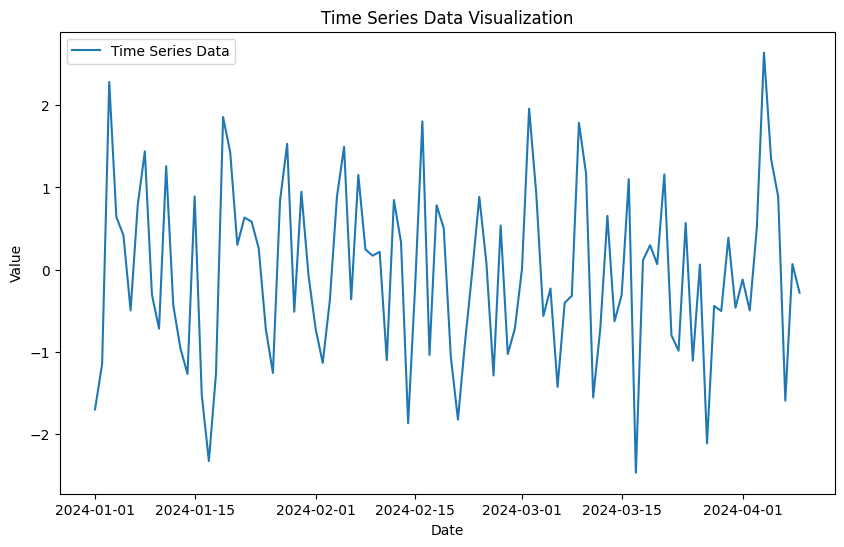

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data Visualization')
plt.legend()
plt.show()


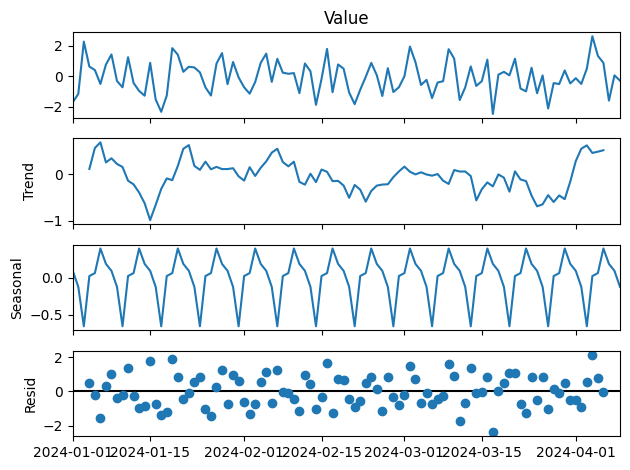

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df['Value'], model='additive')
fig = decomposition.plot()
plt.show()


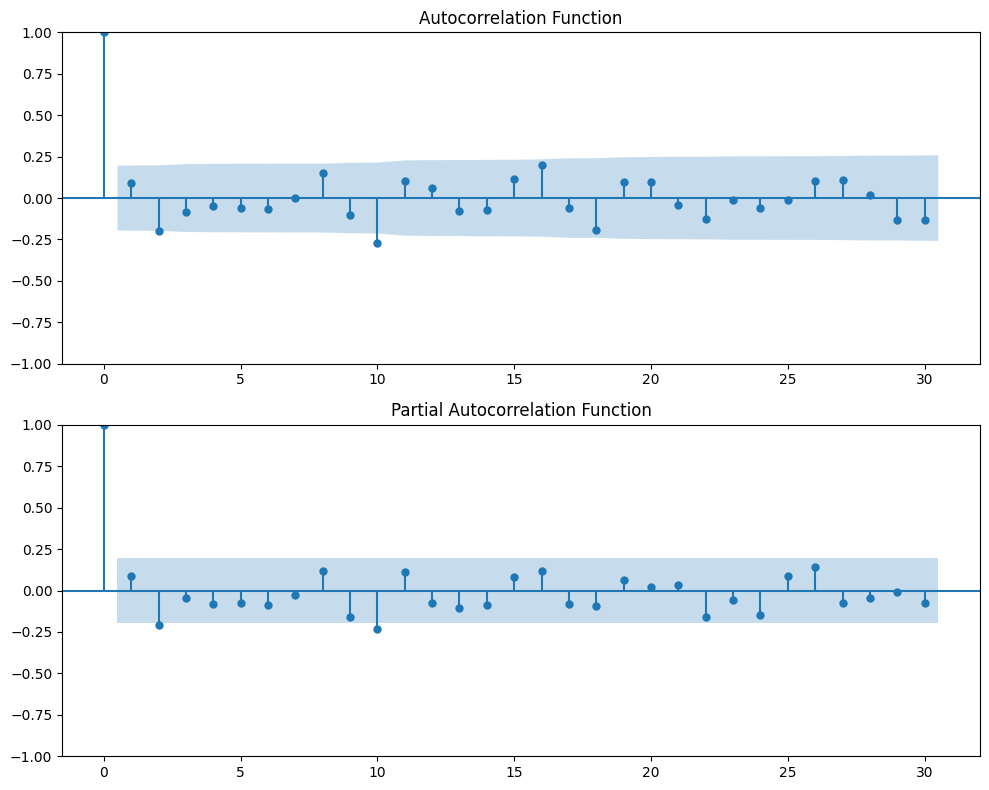

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

sm.graphics.tsa.plot_acf(df['Value'], lags=30, ax=ax[0])
ax[0].set_title('Autocorrelation Function')

sm.graphics.tsa.plot_pacf(df['Value'], lags=30, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


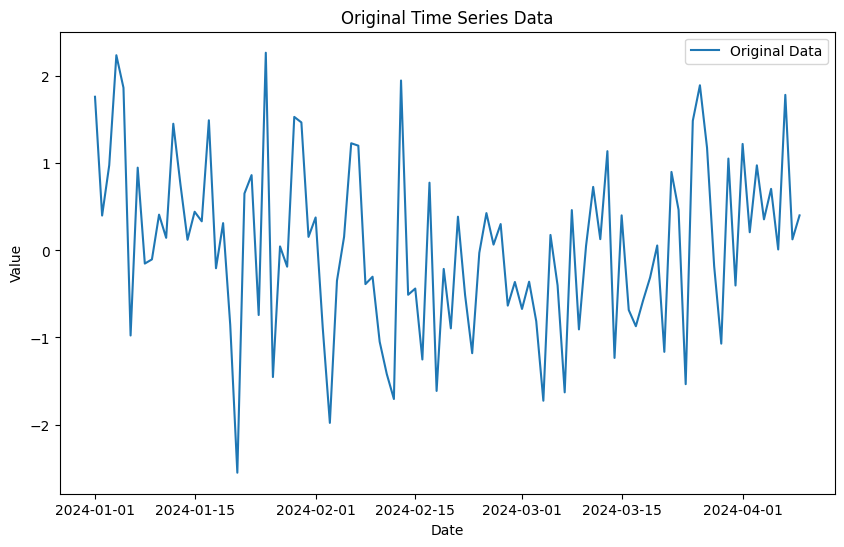

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -140.906
Date:                Thu, 04 Apr 2024   AIC                            289.812
Time:                        05:06:11   BIC                            300.192
Sample:                    01-01-2024   HQIC                           294.012
                         - 04-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0390      0.116     -0.336      0.737      -0.267       0.188
ar.L2          0.0362      0.133      0.272      0.785      -0.224       0.297
ma.L1         -0.8983      0.066    -13.532      0.0

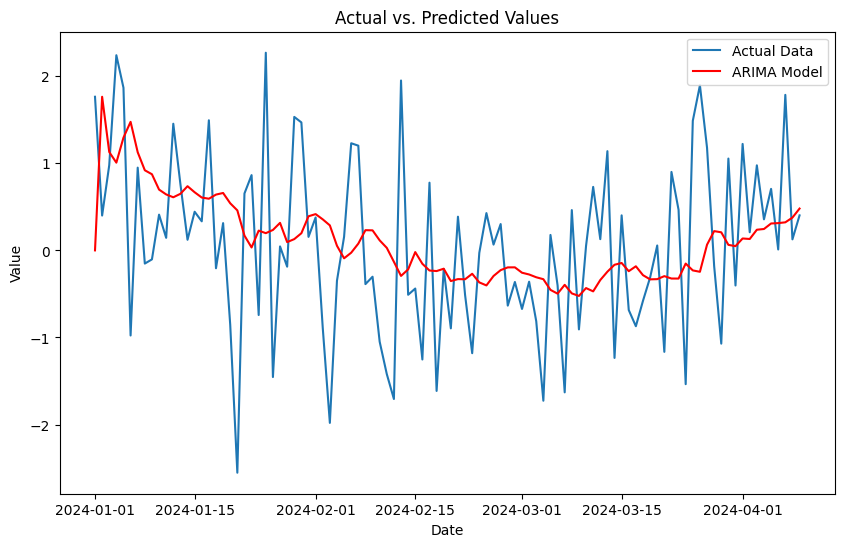

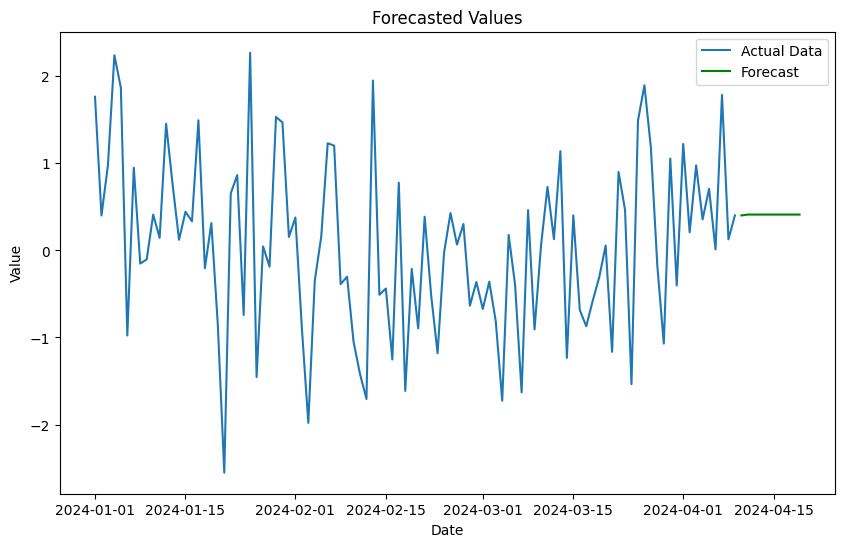

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=100)
values = np.random.randn(100)
df = pd.DataFrame({'date': dates, 'value': values})
df.set_index('date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Original Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series Data')
plt.legend()
plt.show()

p = 2
d = 1
q = 1
model = sm.tsa.ARIMA(df['value'], order=(p, d, q))
results = model.fit()

print(results.summary())

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Actual Data')
plt.plot(df.index, results.fittedvalues, label='ARIMA Model', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

forecast_steps = 10
forecast = results.forecast(steps=forecast_steps)

forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='D')[1:]
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Actual Data')
plt.plot(forecast_dates, forecast, label='Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecasted Values')
plt.legend()
plt.show()
